采用Kmeans 算法实现2D数据自动聚类，预测V1=80,V2=60数据类别；
计算预测准确率，完成结果矫正
采用KNN、Meanshift 算法重复步骤1-2


In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')
data.head()


,V1,V2,label
0,0.496714,-1.415371,0
1,-0.138264,-0.420645,0
2,0.647689,-0.342715,0
3,1.523030,-0.802277,0
4,-0.234153,-0.161286,0


In [2]:
x = data.drop(['label'], axis=1)
y = data.loc[:, 'label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [3]:
pd.value_counts(y)

/tmp/ipykernel_10329/3605348509.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y)


label
0    100
1    100
2    100
Name: count, dtype: int64

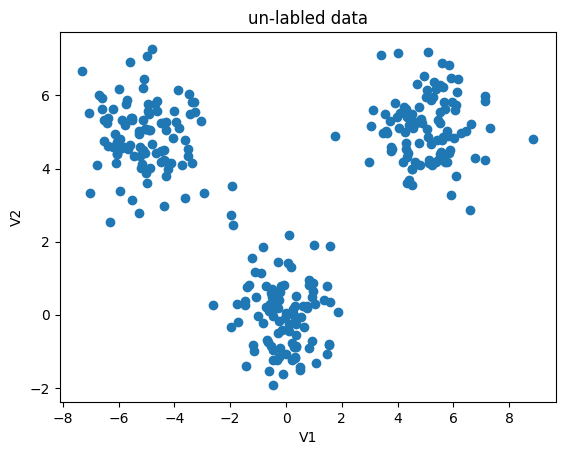

In [4]:
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(x.loc[:, 'V1'], x.loc[:, 'V2'])
plt.title('un-labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()


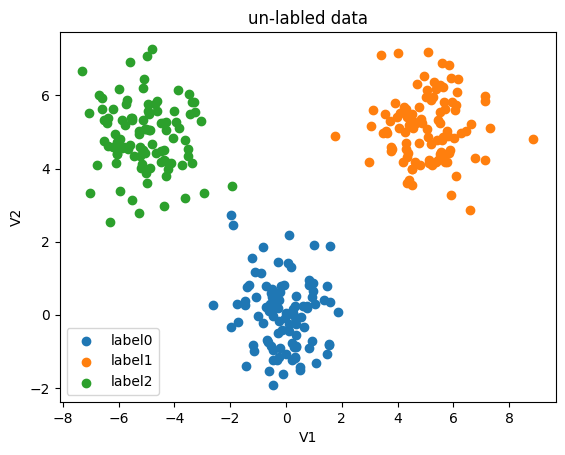

In [5]:
fig2 = plt.figure()
label0 = plt.scatter(x.loc[:, 'V1'][y==0], x.loc[:, 'V2'][y==0])
label1 = plt.scatter(x.loc[:, 'V1'][y==1], x.loc[:, 'V2'][y==1])
label2 = plt.scatter(x.loc[:, 'V1'][y==2], x.loc[:, 'V2'][y==2])
plt.title('un-labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2),('label0', 'label1', 'label2'))
plt.show()

In [6]:
#set the model
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3, random_state=0)
KM.fit(x)


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [7]:
KM.cluster_centers_

array([[ 5.06489625,  5.10684012],
       [-5.05600447,  4.8846944 ],
       [-0.10384652,  0.02230459]])

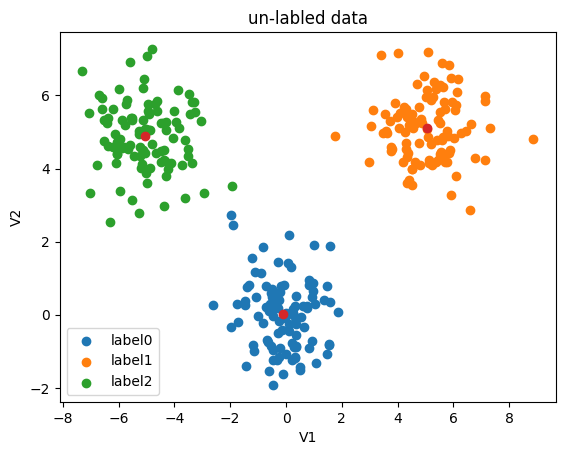

In [8]:
centers = KM.cluster_centers_
fig3 = plt.figure()
label0 = plt.scatter(x.loc[:, 'V1'][y==0], x.loc[:, 'V2'][y==0])
label1 = plt.scatter(x.loc[:, 'V1'][y==1], x.loc[:, 'V2'][y==1])
label2 = plt.scatter(x.loc[:, 'V1'][y==2], x.loc[:, 'V2'][y==2])
plt.title('un-labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2),('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

In [9]:
y_predict_test = KM.predict([[8, 6]])
print(y_predict_test)


[0]


/usr/local/lib64/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [10]:
y_predict = KM.predict(x)
print(pd.value_counts(y_predict))

2    100
0    100
1    100
Name: count, dtype: int64


/tmp/ipykernel_10329/2363594748.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_predict))


In [11]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.0


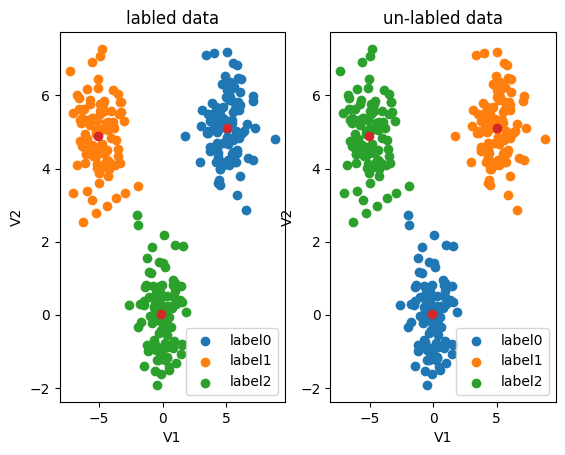

In [12]:
fig4 = plt.subplot(121)
label0 = plt.scatter(x.loc[:, 'V1'][y_predict==0], x.loc[:, 'V2'][y_predict==0])
label1 = plt.scatter(x.loc[:, 'V1'][y_predict==1], x.loc[:, 'V2'][y_predict==1])
label2 = plt.scatter(x.loc[:, 'V1'][y_predict==2], x.loc[:, 'V2'][y_predict==2])
plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2),('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])

fig4 = plt.subplot(122)
label0 = plt.scatter(x.loc[:, 'V1'][y==0], x.loc[:, 'V2'][y==0])
label1 = plt.scatter(x.loc[:, 'V1'][y==1], x.loc[:, 'V2'][y==1])
label2 = plt.scatter(x.loc[:, 'V1'][y==2], x.loc[:, 'V2'][y==2])
plt.title('un-labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2),('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

In [13]:
y_corrected = []
for i in y_predict:
    if i == 0:
        y_corrected.append(1)
    elif i == 1:
        y_corrected.append(2)
    else:
        y_corrected.append(0)

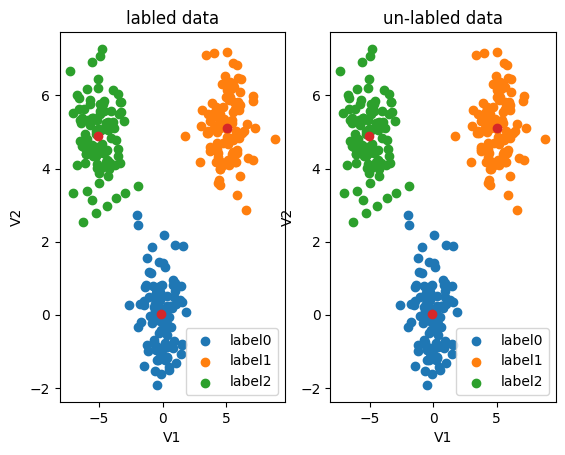

In [14]:
y_corrected = np.array(y_corrected)
fig5 = plt.subplot(121)
label0 = plt.scatter(x.loc[:, 'V1'][y_corrected==0], x.loc[:, 'V2'][y_corrected==0])
label1 = plt.scatter(x.loc[:, 'V1'][y_corrected==1], x.loc[:, 'V2'][y_corrected==1])
label2 = plt.scatter(x.loc[:, 'V1'][y_corrected==2], x.loc[:, 'V2'][y_corrected==2])
plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2),('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])

fig6 = plt.subplot(122)
label0 = plt.scatter(x.loc[:, 'V1'][y==0], x.loc[:, 'V2'][y==0])
label1 = plt.scatter(x.loc[:, 'V1'][y==1], x.loc[:, 'V2'][y==1])
label2 = plt.scatter(x.loc[:, 'V1'][y==2], x.loc[:, 'V2'][y==2])
plt.title('un-labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2),('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

In [15]:
accuracy = accuracy_score(y, y_corrected)
print(accuracy)

1.0


In [16]:
#establish a KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x, y)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [17]:
#predict
y_test = KNN.predict([[80, 60]])
print(y_test)

[1]


/usr/local/lib64/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [18]:
y_predict = KNN.predict(x)
accuracy = accuracy_score(y, y_predict)
print(accuracy)

1.0


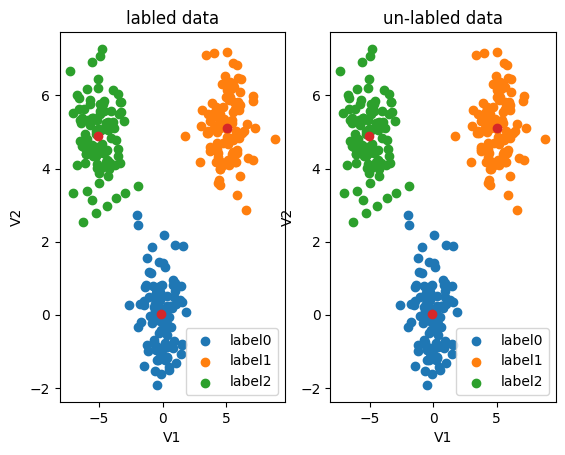

In [19]:
fig6 = plt.subplot(121)
label0 = plt.scatter(x.loc[:, 'V1'][y_predict==0], x.loc[:, 'V2'][y_predict==0])
label1 = plt.scatter(x.loc[:, 'V1'][y_predict==1], x.loc[:, 'V2'][y_predict==1])
label2 = plt.scatter(x.loc[:, 'V1'][y_predict==2], x.loc[:, 'V2'][y_predict==2])
plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2),('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])

fig7 = plt.subplot(122)
label0 = plt.scatter(x.loc[:, 'V1'][y==0], x.loc[:, 'V2'][y==0])
label1 = plt.scatter(x.loc[:, 'V1'][y==1], x.loc[:, 'V2'][y==1])
label2 = plt.scatter(x.loc[:, 'V1'][y==2], x.loc[:, 'V2'][y==2])
plt.title('un-labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2),('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

In [20]:
#meanshift model
from sklearn.cluster import MeanShift,estimate_bandwidth

#obtain the bandwidth
bw = estimate_bandwidth(x, n_samples=300)
print(bw)

2.6945749164171455


In [21]:
ms = MeanShift(bandwidth=bw)
ms.fit(x)


,bandwidth,np.float64(2.6945749164171455)
,seeds,None
,bin_seeding,False
,min_bin_freq,1
,cluster_all,True
,n_jobs,None
,max_iter,300


In [22]:
y_predict_ms = ms.predict(x)
print(pd.value_counts(y_predict_ms))

0    100
2    100
1    100
Name: count, dtype: int64


/tmp/ipykernel_10329/1460779735.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_predict_ms))


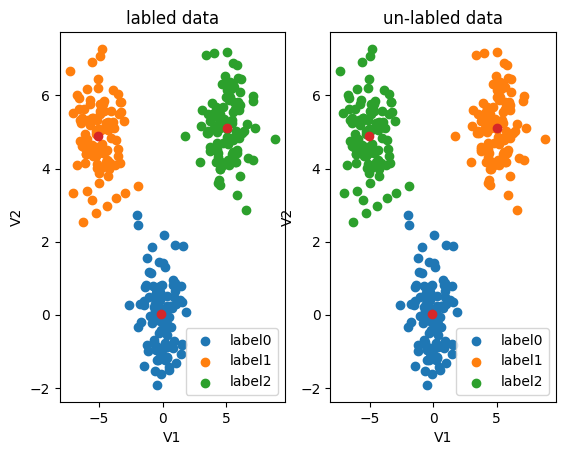

In [23]:
fig7 = plt.subplot(121)
label0 = plt.scatter(x.loc[:, 'V1'][y_predict_ms==0], x.loc[:, 'V2'][y_predict_ms==0])
label1 = plt.scatter(x.loc[:, 'V1'][y_predict_ms==1], x.loc[:, 'V2'][y_predict_ms==1])
label2 = plt.scatter(x.loc[:, 'V1'][y_predict_ms==2], x.loc[:, 'V2'][y_predict_ms==2])
plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2),('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])

fig8 = plt.subplot(122)
label0 = plt.scatter(x.loc[:, 'V1'][y==0], x.loc[:, 'V2'][y==0])
label1 = plt.scatter(x.loc[:, 'V1'][y==1], x.loc[:, 'V2'][y==1])
label2 = plt.scatter(x.loc[:, 'V1'][y==2], x.loc[:, 'V2'][y==2])
plt.title('un-labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2),('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

In [24]:
y_corrected_ms = []
for i in y_predict_ms:
    if i == 0:
        y_corrected_ms.append(0)
    elif i == 1:
        y_corrected_ms.append(2)
    else:
        y_corrected_ms.append(1)

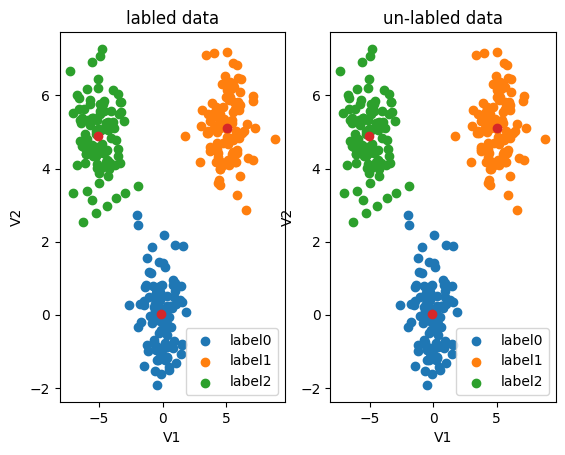

In [25]:
y_corrected_ms = np.array(y_corrected_ms)
fig8 = plt.subplot(121)
label0 = plt.scatter(x.loc[:, 'V1'][y_corrected_ms==0], x.loc[:, 'V2'][y_corrected_ms==0])
label1 = plt.scatter(x.loc[:, 'V1'][y_corrected_ms==1], x.loc[:, 'V2'][y_corrected_ms==1])
label2 = plt.scatter(x.loc[:, 'V1'][y_corrected_ms==2], x.loc[:, 'V2'][y_corrected_ms==2])
plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2),('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])

fig9 = plt.subplot(122)
label0 = plt.scatter(x.loc[:, 'V1'][y==0], x.loc[:, 'V2'][y==0])
label1 = plt.scatter(x.loc[:, 'V1'][y==1], x.loc[:, 'V2'][y==1])
label2 = plt.scatter(x.loc[:, 'V1'][y==2], x.loc[:, 'V2'][y==2])
plt.title('un-labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2),('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()